MultiRAT analysis code
================
Joanes Grandjean

![rat art](../assets/img/rat_art.png)

# Foreword

This is a jupyter notebook which contains all the code for reproducing my
analysis. The code is meant to be followed step-wise. 

If re-using some of the scripts, please follow citations guidelines for
the software used. I’ve provided the links to the software wherever
possible. See also the [license](../LICENSE.md) for this software.


In [70]:
# init variables
init_folder='/home/traaffneu/joagra/code/MultiRat'
analysis_folder='/project/4180000.23/jo_rat_awake'
df_path='../assets/table/awakeRatfull_20220819.tsv'

In [71]:
import os
import glob
import pandas as pd
import numpy as np

df = pd.read_csv(df_path, sep='\t')
df['SubjID']=df["scan"]


here, we move straight to the good stuff. No time to waste

In [72]:
#remove excluded scans
df_exclude = df.loc[(df['exclude'] != 'yes')]

In [73]:
# create empty columns for the different SBA parameters.

df['GSRs_CPu_CPu'] = np.nan
df['GSRs_MOp_MOp'] = np.nan
df['GSRs_S1bf_S1bf'] = np.nan
df['GSRs_S1bf_ACA'] = np.nan
df['GSRs_S1bf_cat'] = np.nan

In [74]:
roi_list = glob.glob((os.path.join(analysis_folder, 'template', 'roi'))+'/*')
seed_list = glob.glob((os.path.join(analysis_folder, 'seed','*'))+'/*')

In [75]:
i_orig=seed_list[0]

In [76]:
i_orig=seed_list[3]
i=i_orig.replace('_RAS','')
i=i.replace('_aroma','')
i=i.replace('_ses-1','')
sub=os.path.basename(i).split('_autobox')[0]
denoise=i.split('/')[5]
seed=os.path.basename(i).split('_')[7]

In [77]:
roi='ACA'
fc_orig=df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]
fc_nan = np.isnan(fc_orig).all()


In [68]:
os.path.basename(df['SubjID'][0]).split('.')[0]

'sub-rat001_task-rest_run-01_bold'

In [ ]:
        if(fc_nan):
            r = re.compile('ACA'+'_l')
            nifti_mask=list(filter(r.findall, roi_list))[0]
            fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
            df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]=fc
    
    roi=seed
    fc_orig=df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]
    fc_nan = np.isnan(fc_orig).all()
    if(fc_nan):
        r = re.compile(seed+'_r')
        nifti_mask=list(filter(r.findall, roi_list))[0]
        fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
        df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]=fc

In [80]:
import pandas as pd
pd.options.mode.chained_assignment = None

from nilearn.input_data import NiftiMasker
import re
import numpy as np

for i_orig in seed_list:
    #print(i_orig)
    i=i_orig.replace('_RAS','')
    i=i.replace('_aroma','')
    i=i.replace('_ses-1','')
    sub=os.path.basename(i).split('_autobox')[0]
    denoise=i.split('/')[5]
    seed=os.path.basename(i).split('_')[7]
    if(seed =='ACA'):
        continue
    elif(seed =='S1bf'):
        roi='ACA'
        fc_orig=df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]
        fc_nan = np.isnan(fc_orig).all()
        if(fc_nan):
            r = re.compile('ACA'+'_l')
            nifti_mask=list(filter(r.findall, roi_list))[0]
            fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
            df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]=fc
    
    roi=seed
    fc_orig=df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]
    fc_nan = np.isnan(fc_orig).all()
    if(fc_nan):
        r = re.compile(seed+'_r')
        nifti_mask=list(filter(r.findall, roi_list))[0]
        fc=NiftiMasker(nifti_mask).fit_transform(i_orig).mean()
        df[(denoise+'_'+seed+'_'+roi)][df['SubjID']==sub]=fc
    
#df.to_csv(df_path, sep='\t', index=False)

In [82]:

df_exclude = df.loc[(df['exclude'] != 'yes')]



print('missing GSRs')
print(df_exclude[np.isnan(df['GSRs_S1bf_S1bf']) | np.isnan(df['GSRs_S1bf_ACA']) | np.isnan(df['GSRs_MOp_MOp'])  | np.isnan(df['GSRs_CPu_CPu'])]['SubjID'].unique())


missing GSRs
[]


In [83]:
# This is a function to estimate functional connectivity specificity. See Grandjean 2020 for details on the reasoning 

def specific_FC(specific_roi, unspecific_ROI):
    if (specific_roi>=0.1) and (unspecific_ROI<0.1):
        cat='Specific'
    elif (specific_roi>=0.1) and (unspecific_ROI>=0.1):
        cat='Unspecific'
    elif (abs(specific_roi)<0.1) and (abs(unspecific_ROI)<0.1):
        cat='No'
    else:
        cat='Spurious'
    return cat



In [84]:
for i in list(range(0,df.shape[0])):
            
    #---- Now doing GSRs condition
    specific=df['GSRs_S1bf_S1bf'][i]
    unspecific=df['GSRs_S1bf_ACA'][i]
    if(np.isnan(specific) | np.isnan(unspecific)):
        print('')
    else:
        df['GSRs_S1bf_cat'][i]=specific_FC(specific,unspecific)  

df.to_csv(df_path, sep='\t', index=False)

In [86]:
#remove excluded scans
df_exclude = df.loc[(df['exclude'] != 'yes')]

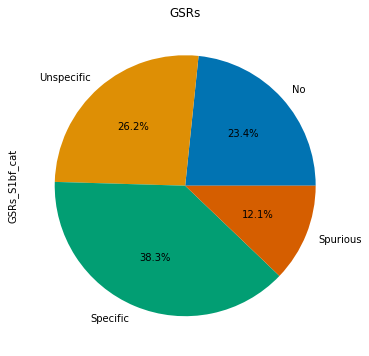

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

sns.set_palette("colorblind")

   
ax5 = df_exclude['GSRs_S1bf_cat'].value_counts(sort=False).plot.pie(title='GSRs',autopct="%.1f%%")    


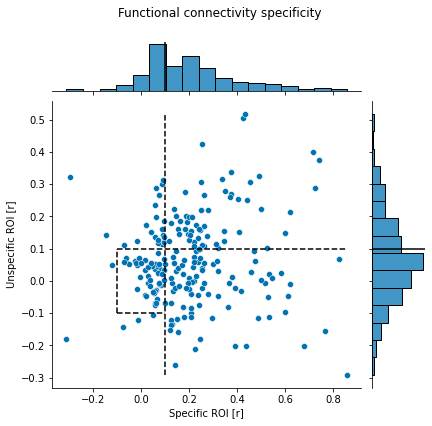

In [89]:
import seaborn as sns 

ax6 = sns.jointplot(data=df_exclude, x='GSRs_S1bf_S1bf', y='GSRs_S1bf_ACA')
#ax6.plot_joint(sns.kdeplot,linestyles='dashed', zorder=0, levels=6)

sns.set_palette("colorblind")

ax6.fig.suptitle('Functional connectivity specificity')
ax6.fig.subplots_adjust(top=0.9)
ax6.ax_joint.set(xlabel='Specific ROI [r]', ylabel='Unspecific ROI [r]')
ax6.ax_joint.vlines(0.1,ymin=min(df_exclude['GSRs_S1bf_ACA']),ymax=max(df_exclude['GSRs_S1bf_ACA']),linestyles='dashed', color='black')
ax6.ax_joint.vlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(-0.1, -0.1,0.1,linestyles='dashed', color='black')
ax6.ax_joint.hlines(0.1, -0.1,xmax=max(df_exclude['GSRs_S1bf_S1bf']),linestyles='dashed', color='black')
ax6.ax_marg_x.axvline(x=0.1, color='black')
ax6.ax_marg_y.axhline(y=0.1, color='black')